In [78]:
import numpy as np
import pandas as pd

In [79]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns

In [80]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [81]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
import gc
import lightgbm as lgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
house_loan=pd.read_csv('/content/loan_data (1).csv') 
house_loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [83]:
house_loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [84]:
house_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [85]:
house_loan.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [86]:
house_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
defaulters=(house_loan.TARGET==1).sum()
payers=(house_loan.TARGET==0).sum()
print((defaulters/payers)*100)

8.781828601345662


In [88]:
without_id=[column for column in house_loan.columns if column!='SK_ID_CURR'] 

In [89]:
na=house_loan[house_loan.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  0


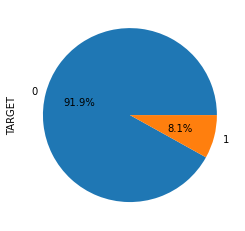

In [90]:
house_loan.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [91]:
import matplotlib as plt

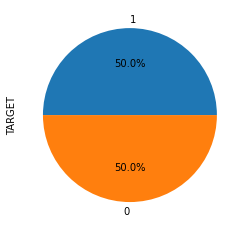

In [92]:
shuffled_data=house_loan.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1] 
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [93]:
import tensorflow as tf

In [94]:
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [95]:
normalised_home_loan.head

<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
207339      340318       1         Cash loans           F            N   
8756        110186       1         Cash loans           M            Y   
230344      366811       1         Cash loans           F            N   
178329      306645       1         Cash loans           M            Y   
55586       164407       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
130947      251878       0         Cash loans           F            Y   
40467       146875       0         Cash loans           F            N   
187004      316791       0         Cash loans           M            N   
131755      252811       0         Cash loans           F            N   
121862      241287       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
207339     

In [96]:
normalised_home_loan.dropna(axis=0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [97]:
normalised_home_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64

In [98]:
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

[ 0. nan  1.  2.  4.  3.  9.]
[ 0. nan  1.  2.  4.  3.  5.  6.]
[ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 16. 18. 27.]
[ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.]
[ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 23. 17.]


In [99]:
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108677,226053,0,Cash loans,M,Y,Y,0,135000.0,679500.0,36333.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
258603,399273,0,Revolving loans,M,Y,Y,1,450000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51880,160079,0,Cash loans,M,Y,Y,0,202500.0,750649.5,53514.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [100]:
print(normalised_home_loan.info())
print(normalised_home_loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB
None
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64


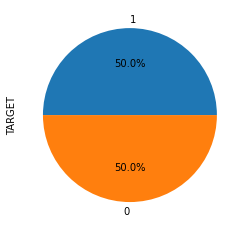

In [101]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

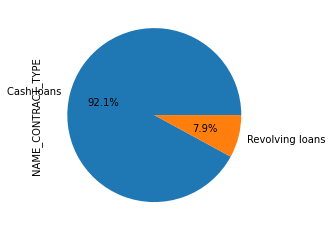

In [102]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 

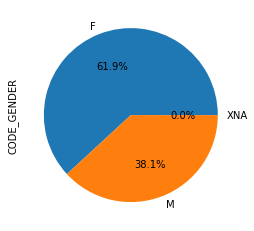

In [103]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%") 

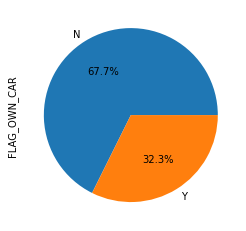

In [104]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%")

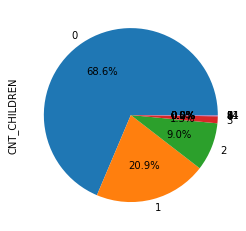

In [105]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [106]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:

cf.set_config_file(theme='polar')

In [108]:
normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [109]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

0    64.864865
1    35.135135
Name: TARGET, dtype: float64

In [110]:
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 

1    57.047872
0    42.952128
Name: TARGET, dtype: float64
1    81.818182
0    18.181818
Name: TARGET, dtype: float64


In [111]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

1    51.350064
0    48.649936
Name: TARGET, dtype: float64
0    52.823962
1    47.176038
Name: TARGET, dtype: float64


In [112]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

1    56.280372
0    43.719628
Name: TARGET, dtype: float64
0    53.867691
1    46.132309
Name: TARGET, dtype: float64


In [113]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 

1    50.802923
0    49.197077
Name: TARGET, dtype: float64
0    59.309995
1    40.690005
Name: TARGET, dtype: float64


In [114]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=5)

In [115]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
302218         Cash loans                      0.0
167526         Cash loans                      0.0
159305         Cash loans                      0.0
275427         Cash loans                      0.0
8837           Cash loans                      0.0
192094         Cash loans                      0.0
235115    Revolving loans                      1.0
79051          Cash loans                      0.0
123267    Revolving loans                      1.0
5517           Cash loans                      0.0
128624         Cash loans                      0.0
187583         Cash loans                      0.0
143193         Cash loans                      0.0
288269         Cash loans                      0.0
44320          Cash loans                      0.0
256898         Cash loans                      0.0
118237         Cash loans                      0.0
5980      Revolving loans                      1.0
96475          Cash loans      

In [116]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
302218           M               1.0
167526           F               0.0
159305           M               1.0
275427           F               0.0
8837             M               1.0
192094           M               1.0
235115           F               0.0
79051            F               0.0
123267           M               1.0
5517             F               0.0
128624           M               1.0
187583           F               0.0
143193           M               1.0
288269           F               0.0
44320            F               0.0
256898           F               0.0
118237           F               0.0
5980             M               1.0
96475            F               0.0
249976           F               0.0
0.0    30716
1.0    18932
2.0        2
Name: CODE_GENDER_CODE, dtype: int64


In [117]:
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0


In [118]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
302218            N                0.0
167526            N                0.0
159305            N                0.0
275427            N                0.0
8837              N                0.0
192094            N                0.0
235115            N                0.0
79051             N                0.0
123267            N                0.0
5517              N                0.0
128624            N                0.0
187583            N                0.0
143193            N                0.0
288269            Y                1.0
44320             Y                1.0
256898            N                0.0
118237            N                0.0
5980              Y                1.0
96475             N                0.0
249976            N                0.0
0.0    33591
1.0    16059
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [119]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
302218                0.0             0
167526                0.0             0
159305                2.0             2
275427                0.0             0
8837                  0.0             0
192094                0.0             0
235115                0.0             0
79051                 0.0             0
123267                1.0             1
5517                  0.0             0
128624                0.0             0
187583                1.0             1
143193                0.0             0
288269                0.0             0
44320                 0.0             0
256898                0.0             0
118237                2.0             2
5980                  0.0             0
96475                 0.0             0
249976                0.0             0
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
9.0         1
10.0        1
7.0         1
Name: 

In [120]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)

In [121]:
normalised_home_loan['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [122]:
y=normalised_home_loan.TARGET 

In [123]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X=normalised_home_loan[normalised_home_loan_features]

In [126]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

In [127]:
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [128]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


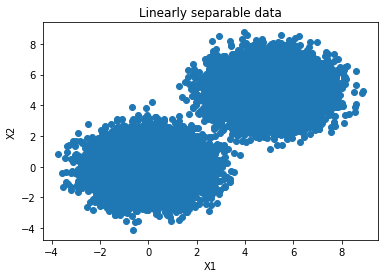

In [129]:
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.title('Linearly separable data')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [130]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix

In [131]:
clf=svm.SVC(kernel='linear')

In [132]:
clf=clf.fit(X_train,y_train)

In [133]:
predictions = clf.predict(X_test)

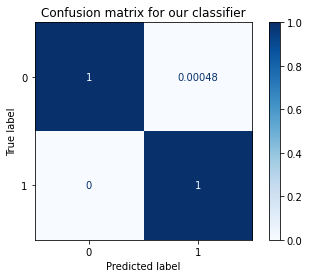

In [134]:
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.pyplot.title('Confusion matrix for our classifier')
plt.pyplot.show(matrix)
plt.pyplot.show()

In [135]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [136]:
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

0.9995064774830351
1.0
[0.99975851 0.99975318]


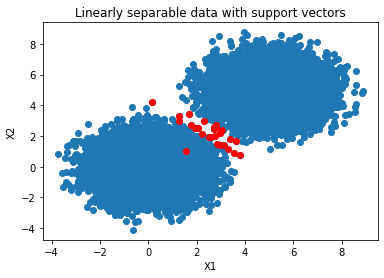

In [137]:
support_vectors = clf.support_vectors_
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.pyplot.title('Linearly separable data with support vectors')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [138]:
from mlxtend.plotting import plot_decision_regions

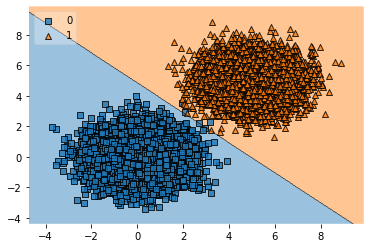

In [139]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.pyplot.show()